In [1]:
import sys
sys.path.append("/neurospin/lbi/monkeyfmri/deepstim/workspace/2023_ASM_tembedding/gitproject/2023_asm_tembedding")

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import pandas as pd
import matplotlib.animation as animation
import scipy as sc
import seaborn as sns

## Fonctions utiles

In [3]:
dfc = np.load('/neurospin/lbi/monkeyfmri/deepstim/database/ANESTHETIC_database/derivatives/reference_kmeans/inputs/inputs.npy')
meta = pd.read_csv("/neurospin/lbi/monkeyfmri/deepstim/database/ANESTHETIC_database/derivatives/reference_kmeans/inputs/metadata.tsv", sep="\t")

In [4]:
n_runs = len(meta)
n_wins = 464
dfc_train_propofol = dfc[meta["monkey"].isin(['almira', 'khali', 'kimiko', 'rana']) & meta["condition"].isin(['deep-propofol','light-propofol'])].reshape((-1, n_wins, 82, 82))
dfc_test_propofol = dfc[(meta["monkey"] == "jade") & meta["condition"].isin(['deep-propofol','light-propofol'])].reshape((-1, n_wins, 82, 82))
dfc_all = dfc.reshape((-1, n_wins, 82, 82))
dfc_train_background = dfc[meta["monkey"].isin(['almira', 'khali', 'kimiko', 'rana'])].reshape((-1, n_wins, 82, 82))
dfc_test_background = dfc[(meta["monkey"] == "jade")].reshape((-1, n_wins, 82, 82))
conditions_train = meta["condition"][meta["monkey"].isin(['almira', 'khali', 'kimiko', 'rana']) & meta["condition"].isin(['deep-propofol','light-propofol'])]
conditions_test = meta["condition"][meta["monkey"].isin(['jade']) & meta["condition"].isin(['deep-propofol','light-propofol'])]
dict_conditions = {"light-propofol":0, "deep-propofol":1}
labels_train = [dict_conditions[elem] for elem in conditions_train]
labels_test = [dict_conditions[elem] for elem in conditions_test]

## Contrastive PCA (ma méthode)

In [6]:
dict_labels = {"light-propofol" : 1, "deep-propofol" : 2}
meta_train = meta[meta["monkey"].isin(['almira', 'khali', 'kimiko', 'rana']) & (meta["condition"].isin(["light-propofol","deep-propofol"]))]["condition"]
labels_train_condition = np.array([meta_train.iloc[i] for i in range(len(meta_train))])
labels_train = np.array([dict_labels[elem] for elem in labels_train_condition]).reshape((len(labels_train_condition)//464,464))

In [7]:
a,b = labels_train.shape
Y = labels_train.reshape((a*b,1))
enc = OneHotEncoder()
Y = sc.sparse.csr_matrix.toarray(enc.fit_transform(Y))
Y = StandardScaler().fit_transform(Y)

In [19]:
alpha = 10
a,b,c = fc_train_anaesthesized_vector.shape
X = fc_train_anaesthesized_vector.reshape((a*b,c))
scaler = StandardScaler().fit(X)
X = scaler.transform(X)
X = np.concatenate((X,alpha*Y),axis = 1)
C_train = (X.T @ X) / X.shape[0]

In [20]:
eigenvalues,eigenvectors = sc.linalg.eig(C_train)

In [21]:
X_transformed = X @ eigenvectors

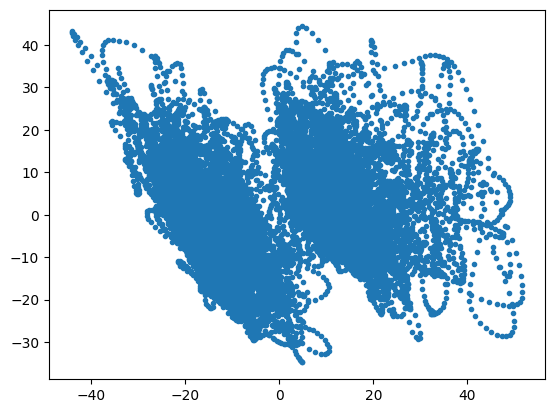

In [22]:
plt.scatter(X_transformed[:,0].flatten(),X_transformed[:,2].flatten(),marker = '.')

In [87]:
eigenvectors_effective[:,0].shape

(3321,)

In [102]:
82*81//2

3321

In [88]:
eigenvectors[0:0,0]

array([], dtype=float64)

In [81]:
eigenvectors[:,0]

array([-1.00327852e-05,  1.22650566e-04, -1.33885405e-06, ...,
        3.20173385e-05,  7.07101103e-01, -7.07101103e-01])

In [31]:
eigenmatrix = package.preprocessing.reconstruct_matrix(torch.from_numpy(eigenvectors_effective[:,4]))

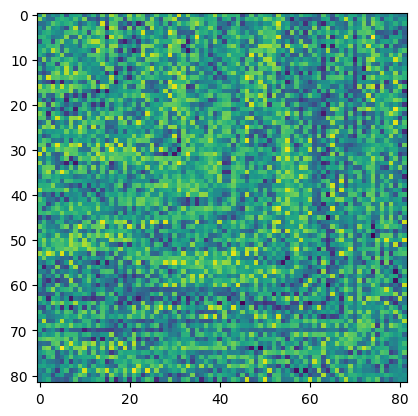

In [32]:
plt.imshow(eigenmatrix.numpy())

In [23]:
eigenvectors_effective = eigenvectors[:-2,:]

"""
a,b,c = fc_train_anaesthesized_vector.shape
X_train_anaesthesized = fc_train_anaesthesized_vector.reshape((a*b,c))
X_train_anaesthesized = scaler.transform(X_train_anaesthesized)
X_train_anaesthesized_transformed = X_train_anaesthesized @ eigenvectors

d,e,f = fc_train_awake_vector.shape
X_train_awake = fc_train_awake_vector.reshape((d*e,f))
X_train_awake = scaler.transform(X_train_awake)
X_train_awake_transformed = X_train_awake @ eigenvectors
"""

a,b,c = fc_train_light_propofol_vector.shape
X_train_light_propofol = fc_train_light_propofol_vector.reshape((a*b,c))
X_train_light_propofol = scaler.transform(X_train_light_propofol)
X_train_light_propofol_transformed = X_train_light_propofol @ eigenvectors_effective

d,e,f = fc_train_deep_propofol_vector.shape
X_train_deep_propofol = fc_train_deep_propofol_vector.reshape((d*e,f))
X_train_deep_propofol = scaler.transform(X_train_deep_propofol)
X_train_deep_propofol_transformed = X_train_deep_propofol @ eigenvectors_effective

"""
a,b,c = fc_test_anaesthesized_vector.shape
X_test_anaesthesized = fc_test_anaesthesized_vector.reshape((a*b,c))
X_test_anaesthesized = scaler.transform(X_test_anaesthesized)
X_test_anaesthesized_transformed = X_test_anaesthesized @ eigenvectors

d,e,f = fc_test_awake_vector.shape
X_test_awake = fc_test_awake_vector.reshape((d*e,f))
X_test_awake = scaler.transform(X_test_awake)
X_test_awake_transformed = X_test_awake @ eigenvectors
"""

a,b,c = fc_test_light_propofol_vector.shape
X_test_light_propofol = fc_test_light_propofol_vector.reshape((a*b,c))
X_test_light_propofol = scaler.transform(X_test_light_propofol)
X_test_light_propofol_transformed = X_test_light_propofol @ eigenvectors_effective

d,e,f = fc_test_deep_propofol_vector.shape
X_test_deep_propofol = fc_test_deep_propofol_vector.reshape((d*e,f))
X_test_deep_propofol = scaler.transform(X_test_deep_propofol)
X_test_deep_propofol_transformed = X_test_deep_propofol @ eigenvectors_effective

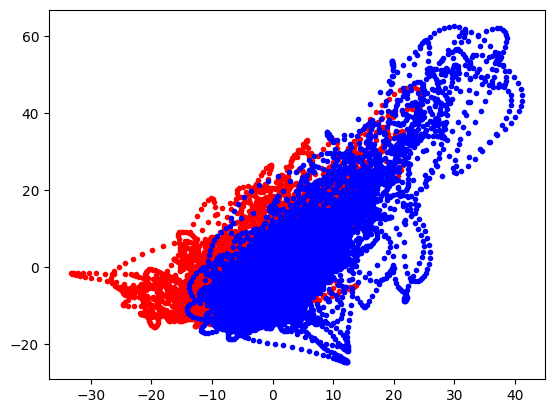

In [24]:
plt.scatter(X_train_deep_propofol_transformed[:,0].flatten(),X_train_deep_propofol_transformed[:,1].flatten(),marker='.',c = "r")
plt.scatter(X_train_light_propofol_transformed[:,0].flatten(),X_train_light_propofol_transformed[:,1].flatten(),marker='.', c = "b")

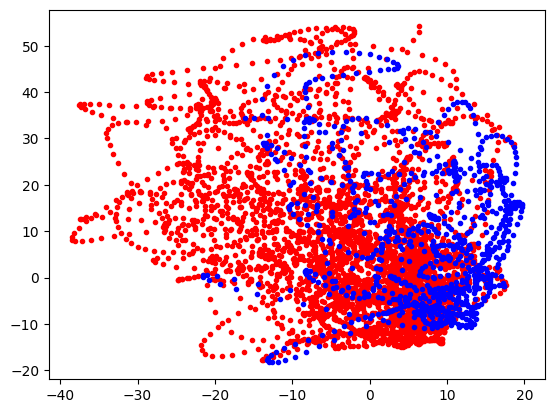

In [59]:
plt.scatter(X_test_deep_propofol_transformed[:,2].flatten(),X_test_deep_propofol_transformed[:,1].flatten(),marker='.',c = "r")
plt.scatter(X_test_light_propofol_transformed[:,2].flatten(),X_test_light_propofol_transformed[:,1].flatten(),marker='.', c = "b")
#plt.scatter(X_test_awake_transformed[:,0].flatten(),X_test_awake_transformed[:,1].flatten(),marker='.')

## Méthode du papier

### Awake vs Anaesthesized

In [33]:
alpha = 10

a,b,c = fc_train_awake_vector.shape
X = fc_train_awake_vector.reshape((a*b,c))

d,e,f = fc_train_anaesthesized_vector.shape
Y = fc_train_anaesthesized_vector.reshape((d*e,f))

scalerX = StandardScaler().fit(X)
X = scalerX.transform(X)
C_X = (X.T @ X) / X.shape[0]

scalerY = StandardScaler().fit(Y)
Y = scalerX.transform(Y)
C_Y = (Y.T @ Y) / Y.shape[0]

C = C_X - alpha * C_Y

In [34]:
eig = sc.linalg.eig(C)
eigenvectors = eig[1]
eigenvalues = eig[0]

In [35]:
X_transformed = X @ eigenvectors

In [36]:
a,b,c = fc_train_anaesthesized_vector.shape
X_train_anaesthesized = fc_train_anaesthesized_vector.reshape((a*b,c))
X_train_anaesthesized = scalerX.transform(X_train_anaesthesized)
X_train_anaesthesized_transformed = X_train_anaesthesized @ eigenvectors

d,e,f = fc_train_awake_vector.shape
X_train_awake = fc_train_awake_vector.reshape((d*e,f))
X_train_awake = scalerY.transform(X_train_awake)
X_train_awake_transformed = X_train_awake @ eigenvectors

a,b,c = fc_train_light_propofol_vector.shape
X_train_light_propofol = fc_train_light_propofol_vector.reshape((a*b,c))
X_train_light_propofol = scalerX.transform(X_train_light_propofol)
X_train_light_propofol_transformed = X_train_light_propofol @ eigenvectors

d,e,f = fc_train_deep_propofol_vector.shape
X_train_deep_propofol = fc_train_deep_propofol_vector.reshape((d*e,f))
X_train_deep_propofol = scalerX.transform(X_train_deep_propofol)
X_train_deep_propofol_transformed = X_train_deep_propofol @ eigenvectors

a,b,c = fc_test_anaesthesized_vector.shape
X_test_anaesthesized = fc_test_anaesthesized_vector.reshape((a*b,c))
X_test_anaesthesized = scalerX.transform(X_test_anaesthesized)
X_test_anaesthesized_transformed = X_test_anaesthesized @ eigenvectors

d,e,f = fc_test_awake_vector.shape
X_test_awake = fc_test_awake_vector.reshape((d*e,f))
X_test_awake = scalerY.transform(X_test_awake)
X_test_awake_transformed = X_test_awake @ eigenvectors

a,b,c = fc_test_light_propofol_vector.shape
X_test_light_propofol = fc_test_light_propofol_vector.reshape((a*b,c))
X_test_light_propofol = scalerX.transform(X_test_light_propofol)
X_test_light_propofol_transformed = X_test_light_propofol @ eigenvectors

d,e,f = fc_test_deep_propofol_vector.shape
X_test_deep_propofol = fc_test_deep_propofol_vector.reshape((d*e,f))
X_test_deep_propofol = scalerX.transform(X_test_deep_propofol)
X_test_deep_propofol_transformed = X_test_deep_propofol @ eigenvectors

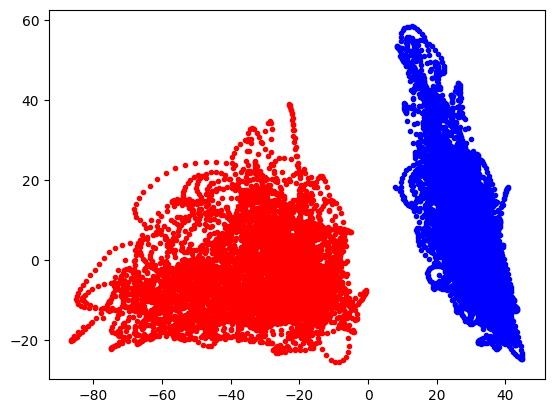

In [38]:
plt.scatter(X_train_anaesthesized_transformed[:,0].flatten(),X_train_anaesthesized_transformed[:,1].flatten(),marker = ".",color="b")
plt.scatter(X_train_awake_transformed[:,0].flatten(),X_train_awake_transformed[:,1].flatten(),marker = ".",color="r")

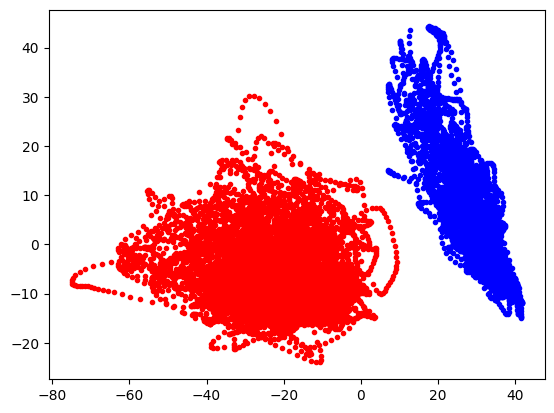

In [39]:
plt.scatter(X_test_anaesthesized_transformed[:,0].flatten(),X_test_anaesthesized_transformed[:,1].flatten(),marker = ".",color="b")
plt.scatter(X_test_awake_transformed[:,0].flatten(),X_test_awake_transformed[:,1].flatten(),marker = ".",color="r")

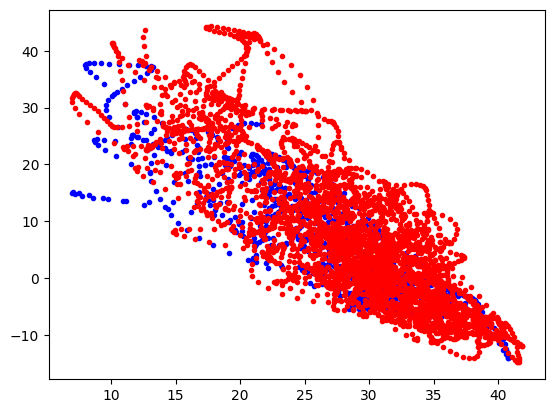

In [40]:
plt.scatter(X_test_light_propofol_transformed[:,0].flatten(),X_test_light_propofol_transformed[:,1].flatten(),marker = ".",color="b")
plt.scatter(X_test_deep_propofol_transformed[:,0].flatten(),X_test_deep_propofol_transformed[:,1].flatten(),marker = ".",color="r")

In [60]:
structural = np.loadtxt('/neurospin/lbi/monkeyfmri/deepstim/database/ANESTHETIC_database/derivatives/reference_kmeans/inputs/structural.txt')

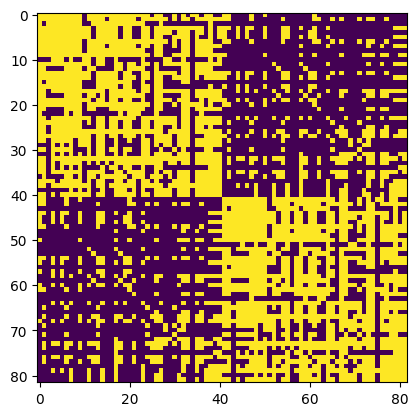

In [67]:
plt.imshow(structural > 1)

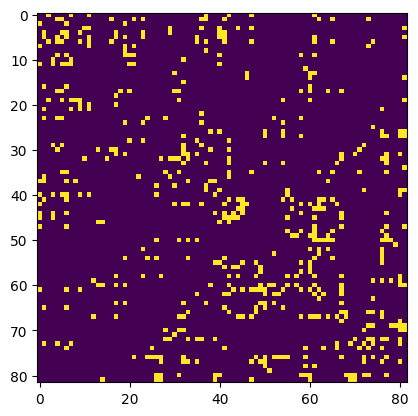

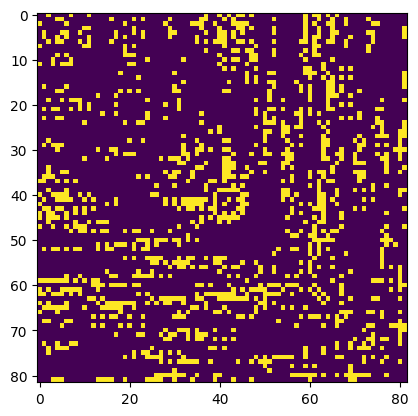

In [69]:
eigenmatrix = package.preprocessing.reconstruct_matrix(torch.from_numpy(eigenvectors[:,0]))
plt.imshow((eigenmatrix > 0.02) & (structural > 1))
plt.show()
plt.imshow((eigenmatrix > 0.02))

### Deep vs Light propofol

In [5]:
iu = np.triu_indices(82,k=1)
X_train = dfc_train_propofol[:,:,iu[0],iu[1]].reshape(-1,3321)
Y_train = dfc_train_background[:,:,iu[0],iu[1]].reshape(-1,3321)
X_test = dfc_test_propofol[:,:,iu[0],iu[1]].reshape(-1,3321)
Y_test = dfc_test_background[:,:,iu[0],iu[1]].reshape(-1,3321)

In [10]:
alpha = 2.15

scalerX = StandardScaler().fit(X)
X = scalerX.transform(X)
C_X = (X.T @ X) / X.shape[0]

scalerY = StandardScaler().fit(Y)
Y = scalerX.transform(Y)
C_Y = (Y.T @ Y) / Y.shape[0]

C = C_X - alpha * C_Y

NameError: name 'fc_train_deep_propofol_vector' is not defined

In [56]:
Y_train.shape

(56144, 3321)

In [6]:
alpha = 2.15

C_X = (X_train @ X_train.T) / X_train.shape[0]
C_Y = (Y_train @ Y_train.T) / Y_train.shape[0]

C = C_X - alpha * C_Y

In [125]:
eig = np.linalg.eig(C)
w, v = eig
n_components = 2
eig_idx = np.argpartition(w, -n_components)[-n_components:]
#eig_idx = eig_idx[np.argsort(-w[eig_idx])]
v_top = v[:,eig_idx]
reduced_dataset = X_train.dot(v_top)
reduced_dataset_test = X_test.dot(v_top)
#reduced_dataset[:,0] = reduced_dataset[:,0]*np.sign(reduced_dataset[0,0])
#reduced_dataset[:,1] = reduced_dataset[:,1]*np.sign(reduced_dataset[0,1])

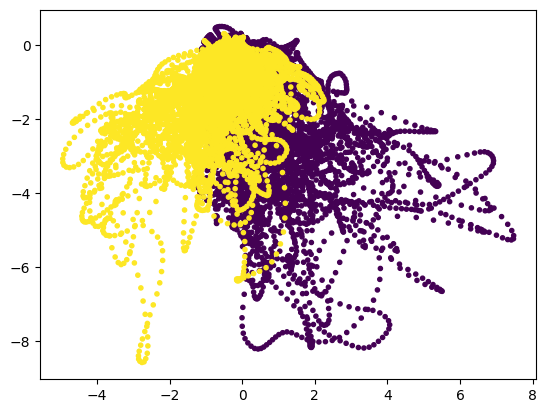

In [102]:
plt.scatter(reduced_dataset[:,0],reduced_dataset[:,1],marker = ".",c=labels_train)

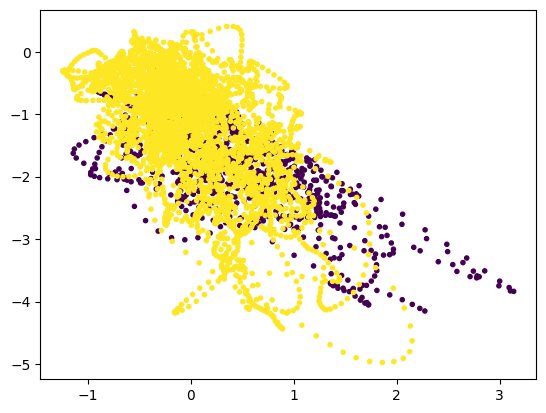

In [126]:
plt.scatter(reduced_dataset_test[:,0],reduced_dataset_test[:,1],marker = ".",c=labels_test)

## Deep vs Light

In [80]:
alpha = 10

a,b,c = fc_train_deep_propofol_vector.shape
X = fc_train_deep_propofol_vector.reshape((a*b,c))

d,e,f = fc_train_light_propofol_vector.shape
Y = fc_train_light_propofol_vector.reshape((d*e,f))

scalerX = StandardScaler().fit(X)
X = scalerX.transform(X)
C_X = (X.T @ X) / X.shape[0]

scalerY = StandardScaler().fit(Y)
Y = scalerX.transform(Y)
C_Y = (Y.T @ Y) / Y.shape[0]

C = C_X + C_Y

In [81]:
eig = sc.linalg.eig(C)
eigenvectors = eig[1]
eigenvalues = eig[0]

In [84]:
a,b,c = fc_train_light_propofol_vector.shape
X_train_light_propofol = fc_train_light_propofol_vector.reshape((a*b,c))
X_train_light_propofol = scalerX.transform(X_train_light_propofol)
X_train_light_propofol_transformed = X_train_light_propofol @ eigenvectors

d,e,f = fc_train_deep_propofol_vector.shape
X_train_deep_propofol = fc_train_deep_propofol_vector.reshape((d*e,f))
X_train_deep_propofol = scalerX.transform(X_train_deep_propofol)
X_train_deep_propofol_transformed = X_train_deep_propofol @ eigenvectors

a,b,c = fc_test_light_propofol_vector.shape
X_test_light_propofol = fc_test_light_propofol_vector.reshape((a*b,c))
X_test_light_propofol = scalerX.transform(X_test_light_propofol)
X_test_light_propofol_transformed = X_test_light_propofol @ eigenvectors

d,e,f = fc_test_deep_propofol_vector.shape
X_test_deep_propofol = fc_test_deep_propofol_vector.reshape((d*e,f))
X_test_deep_propofol = scalerX.transform(X_test_deep_propofol)
X_test_deep_propofol_transformed = X_test_deep_propofol @ eigenvectors

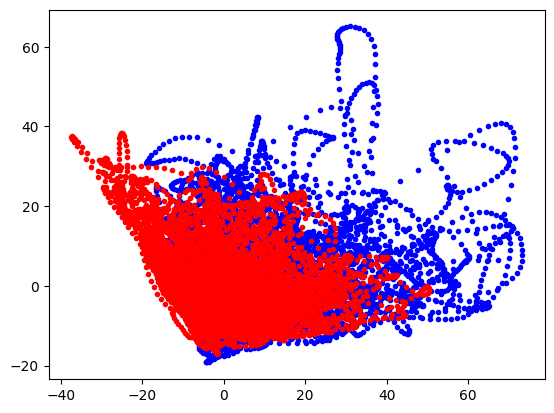

In [87]:
plt.scatter(X_train_light_propofol_transformed[:,0].flatten(),X_train_light_propofol_transformed[:,2].flatten(),marker = ".",color="b")
plt.scatter(X_train_deep_propofol_transformed[:,0].flatten(),X_train_deep_propofol_transformed[:,2].flatten(),marker = ".",color="r")

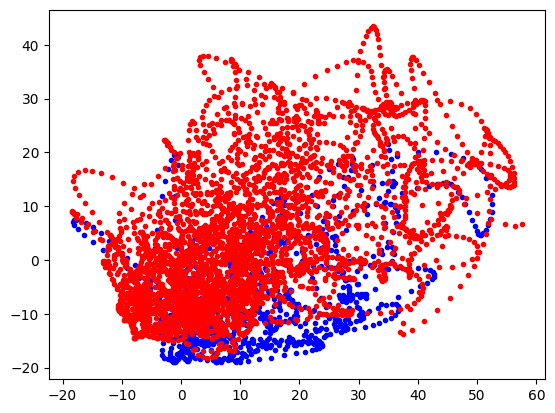

In [86]:
plt.scatter(X_test_light_propofol_transformed[:,0].flatten(),X_test_light_propofol_transformed[:,1].flatten(),marker = ".",color="b")
plt.scatter(X_test_deep_propofol_transformed[:,0].flatten(),X_test_deep_propofol_transformed[:,1].flatten(),marker = ".",color="r")